In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

In [25]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Checking Null Values

In [26]:
print('Null Values:')
data.isnull().sum()

Null Values:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Checking the datatypes and Dimesions of our data

In [27]:
print('Data Types : ')
print(data.info())
print('\n\nDimesions:')
print(data.shape)

Data Types : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Dimesions:
(1338, 7)


Summary of Numerical data

In [28]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Checking for duplicated Values

In [29]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

There are no duplicates in the data frame.

EDA:

Looking for correlation

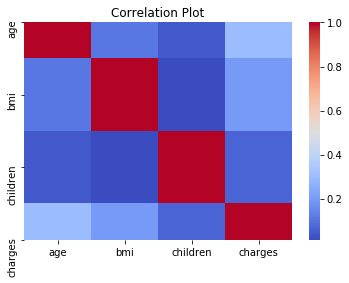

In [30]:
corr_matrix = data.corr()
fig, ax = plt.subplots(1, 1)
sns.heatmap(corr_matrix, cmap = 'coolwarm')
ax.set_title('Correlation Plot')
plt.show()

Histogram to check the normal distribution of Charges variable

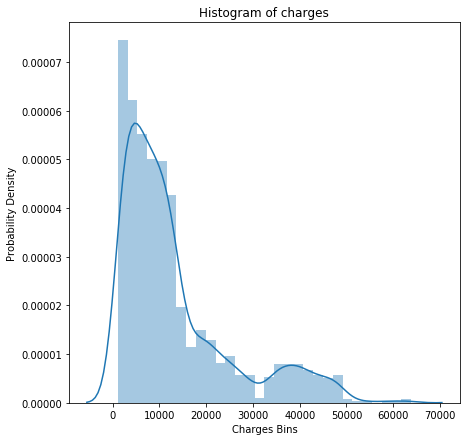

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
sns.distplot(data['charges']).set(title = 'Histogram of charges', xlabel = 'Charges Bins', ylabel = 'Probability Density')
plt.show()

As we can see Charges is almost normally distributed. We will perform a statistical test later to check the hypothesis.

**Boxplot to check outliers in Charges**

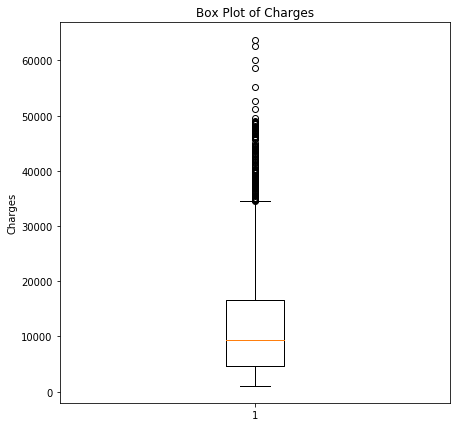

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
z = ax.boxplot(data['charges'])
ax.set_title('Box Plot of Charges')
ax.set_ylabel('Charges')
plt.show()

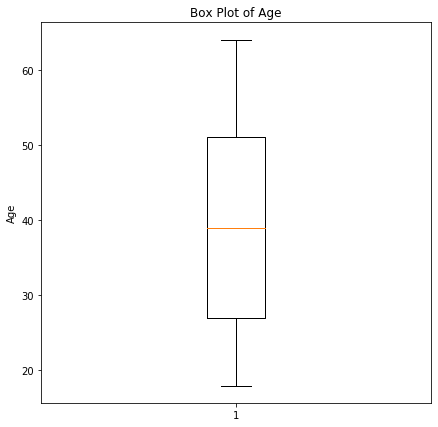

In [33]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.boxplot(data['age'])
ax.set_title('Box Plot of Age')
ax.set_ylabel('Age')
plt.show()

As we can see, there are no outliers in the age

Boxplot to check outliers in BMI

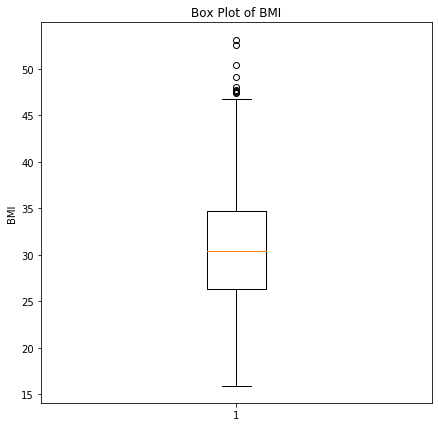

In [34]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.boxplot(data['bmi'])
ax.set_title('Box Plot of BMI')
ax.set_ylabel('BMI')
plt.show()

As we can see, there are few outliers detected by visual inspection. Removing outliers:

In [35]:
q3 = data['bmi'].quantile(0.75)
IQR = q3 - data['bmi'].quantile(0.25)
outlier = q3 + (1.5 * IQR)
data = data[data['bmi'] <= outlier ]
print(data.shape)

(1329, 7)


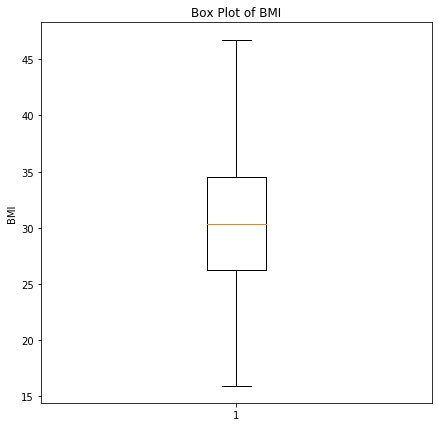

In [36]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.boxplot(data['bmi'])
ax.set_title('Box Plot of BMI')
ax.set_ylabel('BMI')
plt.show()

Now we don't have any outliers present in the bmi.

Checking the normality of BMI

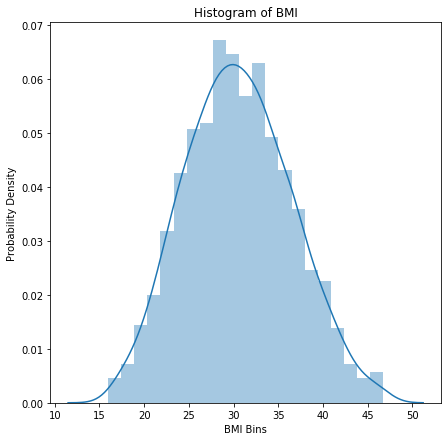

In [37]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
sns.distplot(data['bmi']).set(title = 'Histogram of BMI', xlabel = 'BMI Bins', ylabel = 'Probability Density')
plt.show()

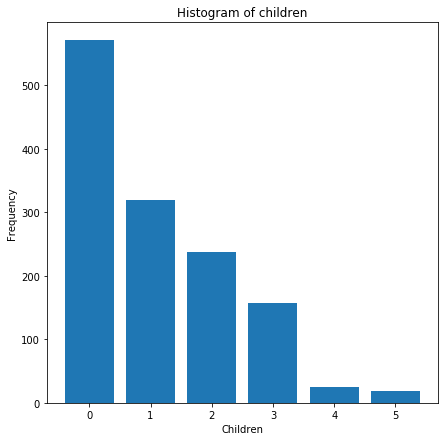

In [38]:
temp = pd.DataFrame(data['children'].value_counts())
temp['number'] = temp.index

fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.bar(temp['number'], temp['children'])
ax.set_xlabel('Children')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of children')
plt.show()

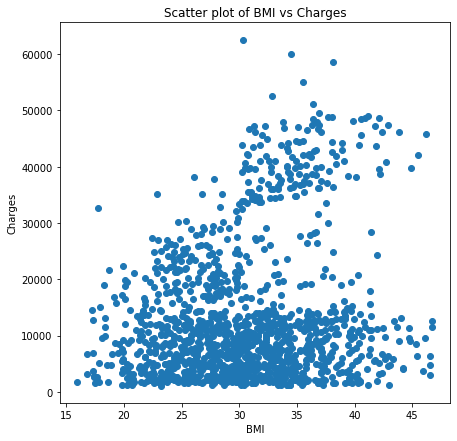

In [39]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.scatter(data['bmi'], data['charges'])
ax.set_xlabel('BMI')
ax.set_ylabel('Charges')
ax.set_title('Scatter plot of BMI vs Charges')
plt.show()

In [40]:
obesity = []
for i in data['bmi']:
    if(i < 18.5):
        obesity.append('Under weight')
    if (i >= 18.5 and i< 25):
        obesity.append('Normal weight')
    if (i >= 25 and i < 30):
        obesity.append('Over weight')
    if (i >= 30):
        obesity.append('Obese')
data.insert(loc = 6, column = 'BMI_range', value = obesity)

In [41]:
data.drop(labels = 'bmi', axis = 1, inplace = True)
data.head()

,age,sex,children,smoker,region,BMI_range,charges
0,19,female,0,yes,southwest,Over weight,16884.92400
1,18,male,1,no,southeast,Obese,1725.55230
2,28,male,3,no,southeast,Obese,4449.46200
3,33,male,0,no,northwest,Normal weight,21984.47061
4,32,male,0,no,northwest,Over weight,3866.85520


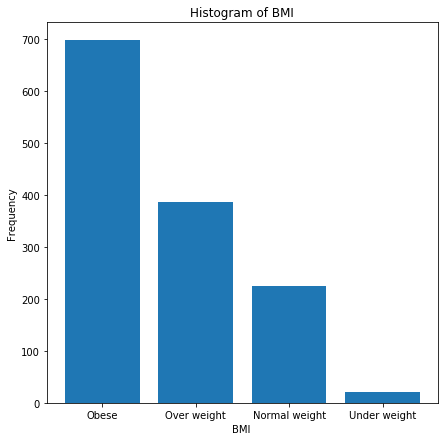

In [42]:
temp = pd.DataFrame(data['BMI_range'].value_counts())

fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.bar(temp.index, temp['BMI_range'])
ax.set_xlabel('BMI ')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of BMI')
plt.show()

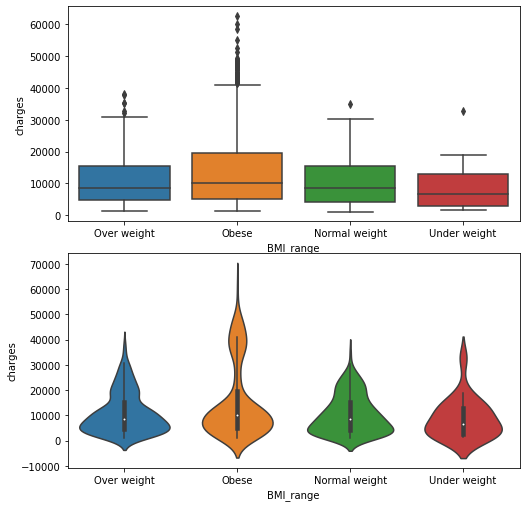

In [43]:
fig, ax = plt.subplots(2, 1, figsize = (7, 7))
plt.tight_layout()
sns.boxplot(x = data['BMI_range'], y = data['charges'], ax = ax[0])
sns.violinplot(x = data['BMI_range'], y = data['charges'], ax = ax[1])
plt.show()

Count Distributions for each Categorical variable

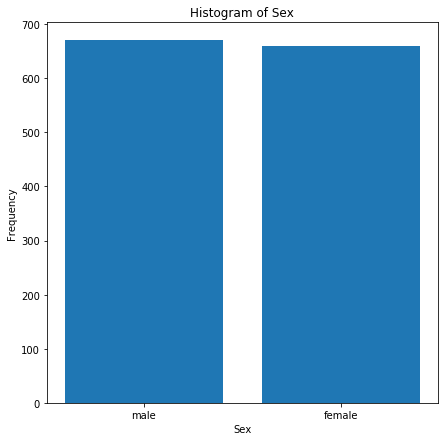

In [44]:
temp = pd.DataFrame(data['sex'].value_counts())

fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.bar(temp.index, temp['sex'])
ax.set_xlabel('Sex')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Sex')
plt.show()

Male and Female are equally balanced. 

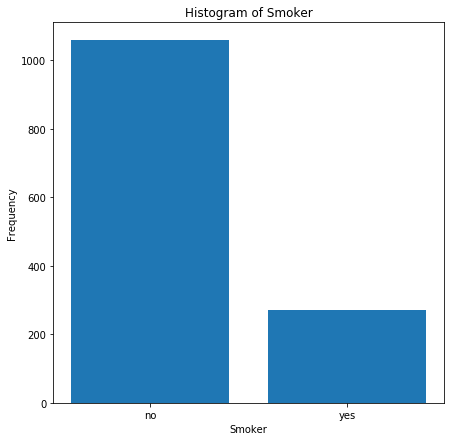

In [45]:
temp = pd.DataFrame(data['smoker'].value_counts())

fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.bar(temp.index, temp['smoker'])
ax.set_xlabel('Smoker')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Smoker')
plt.show()

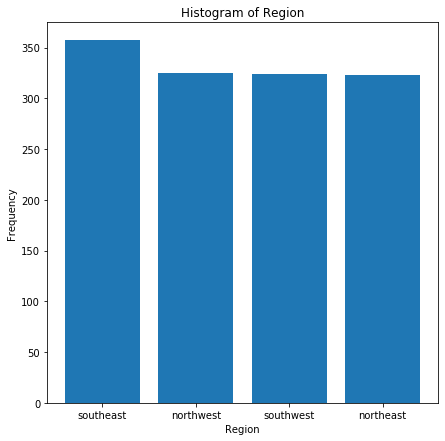

In [46]:
temp = pd.DataFrame(data['region'].value_counts())

fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.bar(temp.index, temp['region'])
ax.set_xlabel('Region')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Region')
plt.show()

Distribution of Charges with respect to each categories

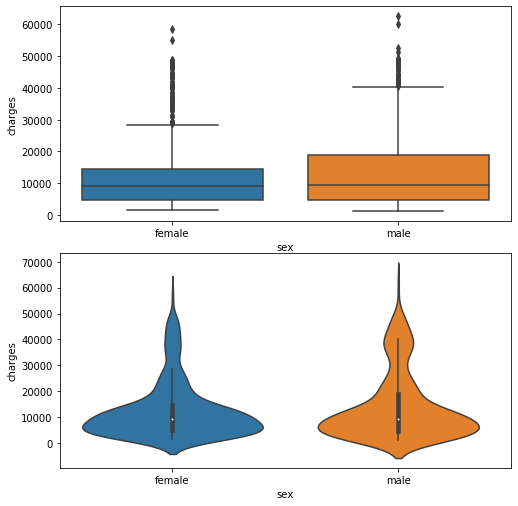

In [47]:
fig, ax = plt.subplots(2, 1, figsize = (7, 7))
plt.tight_layout()
sns.boxplot(x = data['sex'], y = data['charges'], ax = ax[0])
sns.violinplot(x = data['sex'], y = data['charges'], ax = ax[1])
plt.show()

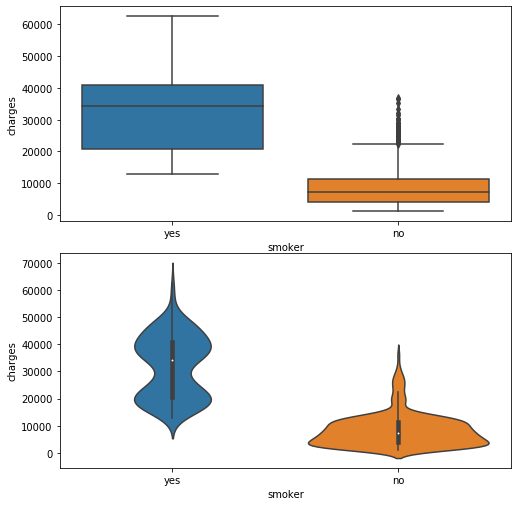

In [48]:
fig, ax = plt.subplots(2, 1, figsize = (7, 7))
plt.tight_layout()
sns.boxplot(x = data['smoker'], y = data['charges'], ax = ax[0])
sns.violinplot(x = data['smoker'], y = data['charges'], ax = ax[1])
plt.show()

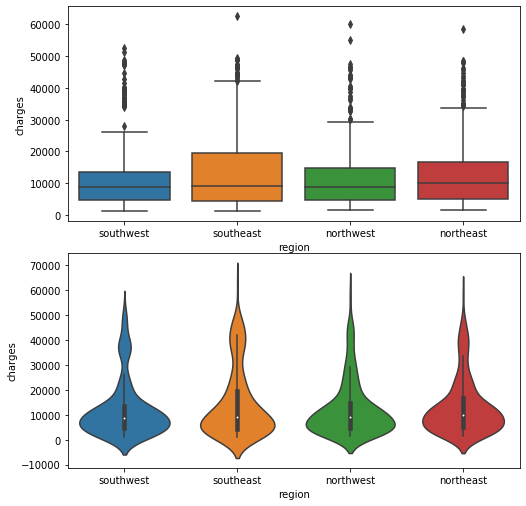

In [49]:
fig, ax = plt.subplots(2, 1, figsize = (7, 7))
plt.tight_layout()
sns.boxplot(x = data['region'], y = data['charges'], ax = ax[0])
sns.violinplot(x = data['region'], y = data['charges'], ax = ax[1])
plt.show()

In [50]:
data.head()

,age,sex,children,smoker,region,BMI_range,charges
0,19,female,0,yes,southwest,Over weight,16884.92400
1,18,male,1,no,southeast,Obese,1725.55230
2,28,male,3,no,southeast,Obese,4449.46200
3,33,male,0,no,northwest,Normal weight,21984.47061
4,32,male,0,no,northwest,Over weight,3866.85520


FEATURE ENGINEERING:
    
Dummy Variable Encoding

In [22]:


def feature_engineering(data):
    X = data.iloc[:, : -1].values
    y = data.iloc[:, -1].values
    

    
    le1 = LabelEncoder()
    X[ : , 1] = le1.fit_transform(X[ : , 1])
    le2 = LabelEncoder()
    X[ : , 4] = le2.fit_transform(X[ : ,4 ])
    le3 = LabelEncoder()
    X[ : , 5] = le3.fit_transform(X[ : , 5])

    ohe1 = OneHotEncoder(categorical_features = [5])
    X = ohe1.fit_transform(X).toarray()
    #X = np.delete(X, [0], 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    
    sc_x = StandardScaler()
    X_train = sc_x.fit_transform(X_train)
    X_test = sc_x.transform(X_test)
    
    sc_y = StandardScaler()
    y_train = sc_y.fit_transform(y_train.reshape(-1, 1))
    y_test = sc_y.transform(y_test.reshape(-1, 1))
    return(sc_y, X_train, X_test, y_train, y_test)

In [52]:
from statsmodels.api import OLS
def training(X_train, y_train, X_train_ols):
    model = OLS(y_train, X_train_ols)
    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)
    results = model.fit()
    return results, model, lin_model

In [39]:
def prediction(model, X_test):
    y_pred = model.predict(X_test)
    return(y_pred)

In [40]:
from sklearn.metrics import mean_absolute_error
def error_calculation(y_test, y_pred):
    mse = mean_absolute_error(y_test, y_pred)
    return  mse

In [56]:
sc_y, X_train, X_test, y_train, y_test = feature_engineering(data)
X_train_ols = np.append(arr= np.ones((len(X_train),1)).astype(int), values = X_train, axis = 1)
X_test_ols = x=np.append(arr= np.ones((len(X_test),1)).astype(int), values = X_test, axis = 1)
results, lin_model, linear_regression_model = training(X_train, y_train, X_train_ols)
y_predicted = prediction(results, X_test_ols)

y_pred_actual = sc_y.inverse_transform(y_predicted)
y_test_actual = sc_y.inverse_transform(y_test)
mse = error_calculation(y_test_actual, y_pred_actual)

print(f'Mean Squared Error : {mse}')
print(results.summary())
print(linear_regression_model.coef_)

Mean Squared Error : 4340.217985922184
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     418.2
Date:                Sun, 12 Apr 2020   Prob (F-statistic):          9.88e-321
Time:                        21:20:52   Log-Likelihood:                -748.86
No. Observations:                1063   AIC:                             1516.
Df Residuals:                    1054   BIC:                             1560.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8

[[ 1.         -0.56467562 -0.58350595  1.63264119 -0.54872725 -1.42892543
   1.00282619 -0.05479709 -0.90266673  2.00353461]
 [ 1.          1.77092822 -0.58350595 -0.61250446 -0.54872725  1.1242855
   1.00282619 -0.27078939 -0.90266673 -0.49911791]
 [ 1.         -0.56467562  1.71377858 -0.61250446 -0.54872725 -1.42892543
  -0.99718177 -0.01329269 -0.90266673 -0.49911791]
 [ 1.         -0.56467562  1.71377858 -0.61250446 -0.54872725 -0.22324249
   1.00282619  0.54998134 -0.07261938 -0.49911791]
 [ 1.         -0.56467562  1.71377858 -0.61250446 -0.54872725  0.48598276
   1.00282619 -0.81796987  1.58747531 -0.49911791]]
[[-0.56467562 -0.58350595  1.63264119 -0.54872725 -1.42892543  1.00282619
  -0.05479709 -0.90266673  2.00353461]
 [ 1.77092822 -0.58350595 -0.61250446 -0.54872725  1.1242855   1.00282619
  -0.27078939 -0.90266673 -0.49911791]
 [-0.56467562  1.71377858 -0.61250446 -0.54872725 -1.42892543 -0.99718177
  -0.01329269 -0.90266673 -0.49911791]
 [-0.56467562  1.71377858 -0.6125044

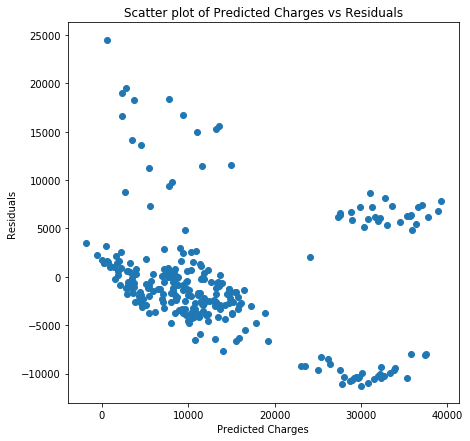

In [68]:
resid = y_test_actual.reshape(len(y_test_actual)) - y_pred_actual
print(X_train_ols[:5])
print(X_train[:5])
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.scatter(y_pred_actual, resid)
ax.set_xlabel('Predicted Charges')
ax.set_ylabel('Residuals')
ax.set_title('Scatter plot of Predicted Charges vs Residuals')
plt.show()

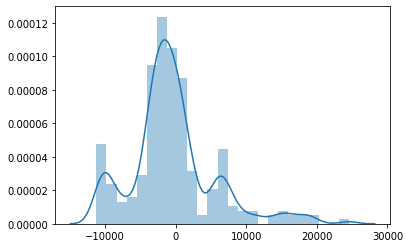

In [64]:
sns.distplot(resid)

In [78]:
from scipy.stats import shapiro
shapiro(data['bmi'])


(0.9951561093330383, 0.0002839665103238076)